<a href="https://colab.research.google.com/github/stutibimali/covid-19-data/blob/master/MAJOR_PROJECT_STUTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA SCIENCE MAJOR PROJECT 
      ON THE TOPIC
#COVID 19 PANDEMIC ANALYSIS 
        by
##STUTI BIMALI


#Importing Libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc
import pandas as pd
pd.set_option('display.expand_frame_repr',False)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA,ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet
from math import sqrt
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'
import seaborn as sns
from random import random
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, median_absolute_error,mean_squared_log_error

#Import dataset

In [2]:
df_conf = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
df_recovered=pd.read_csv('/content/time_series_covid19_recovered_global.csv')
df=pd.read_csv('/content/covid-19dataset (1).csv')


In [3]:
df_conf.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,938

In [4]:
df_deaths.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,6

In [5]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,

In [6]:
df.head()

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100
0,USA,34204374,11603.0,612203,388.0,28103491,48496.0,5488680,5395,102777,1840,486286209,1461188,332802010,297720928,50.2
1,India,28808372,114537.0,346784,2683.0,26976611,189481.0,1484977,8944,20687,249,361174142,259358,1392568209,218344384,15.8
2,Brazil,16907425,65471.0,472629,1661.0,15290500,50808.0,1144296,8318,79022,2209,49842105,232951,213959658,68919860,32.4
3,France,5707683,6654.0,109973,57.0,5406048,13005.0,191662,2525,87263,1681,86584796,1323774,65407534,38087228,56.4
4,Turkey,5282594,6126.0,48068,92.0,5154771,7161.0,79755,1147,62017,564,55250625,648640,85179227,29960321,35.5


#PRE-PROCESSING

In [7]:
df.columns

Index(['country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases', 'Serious', 'Total Cases/1M', 'Total Deaths/1M', 'Total Tests', 'Test/1M', 'Population', 'Total Vaccine', 'Dose/100'], dtype='object')

In [8]:
df['country'].value_counts()

Chile           1
Italy           1
Mexico          1
Brazil          1
Iran            1
Portugal        1
Bangladesh      1
Colombia        1
Romania         1
Iraq            1
Argentina       1
Pakistan        1
Indonesia       1
Czechia         1
USA             1
Netherlands     1
Sweden          1
Israel          1
Malaysia        1
Canada          1
Poland          1
Hungary         1
Philippines     1
Germany         1
France          1
Peru            1
Russia          1
China           1
Jordan          1
Spain           1
Belgium         1
Turkey          1
South Africa    1
Austria         1
Ukraine         1
Switzerland     1
Japan           1
Nepal           1
India           1
Serbia          1
UK              1
Name: country, dtype: int64

In [9]:
df.shape

(41, 16)

In [10]:
df_conf.shape

(266, 248)

In [11]:
df_deaths.shape

(266, 248)

In [12]:
df.isnull().sum()

country            0
Total Cases        0
New Cases          0
Total Deaths       0
New Deaths         0
Total Recovered    0
New Recovered      0
Active Cases       0
Serious            0
Total Cases/1M     0
Total Deaths/1M    0
Total Tests        0
Test/1M            0
Population         0
Total Vaccine      0
Dose/100           0
dtype: int64

In [13]:
df = df.dropna()
df

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100
0,USA,34204374,11603.0,612203,388.0,28103491,48496.0,5488680,5395,102777,1840,486286209,1461188,332802010,297720928,50.2
1,India,28808372,114537.0,346784,2683.0,26976611,189481.0,1484977,8944,20687,249,361174142,259358,1392568209,218344384,15.8
2,Brazil,16907425,65471.0,472629,1661.0,15290500,50808.0,1144296,8318,79022,2209,49842105,232951,213959658,68919860,32.4
3,France,5707683,6654.0,109973,57.0,5406048,13005.0,191662,2525,87263,1681,86584796,1323774,65407534,38087228,56.4
4,Turkey,5282594,6126.0,48068,92.0,5154771,7161.0,79755,1147,62017,564,55250625,648640,85179227,29960321,35.5
5,Russia,5117274,9145.0,123436,399.0,4729077,8565.0,264761,2300,35052,845,139900000,958268,145992552,30001530,20.6
6,UK,4511669,5765.0,127836,13.0,4272579,2019.0,111254,134,66137,1874,186643217,2736036,68216650,66180731,99.1
7,Italy,4230153,2436.0,126472,57.0,3908312,7200.0,195369,788,70060,2095,67177549,1112593,60379256,36392761,60.2
8,Argentina,3939024,23627.0,80867,456.0,3497500,32363.0,360657,7731,86420,1774,14496978,318056,45579889,13079195,28.9
9,Germany,3706934,2249.0,89825,92.0,3533900,6900.0,83209,2036,44113,1069,61380686,730440,84032469,53404798,63.7


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          41 non-null     object 
 1   Total Cases      41 non-null     int64  
 2   New Cases        41 non-null     float64
 3   Total Deaths     41 non-null     int64  
 4   New Deaths       41 non-null     float64
 5   Total Recovered  41 non-null     int64  
 6   New Recovered    41 non-null     float64
 7   Active Cases     41 non-null     int64  
 8   Serious          41 non-null     int64  
 9   Total Cases/1M   41 non-null     int64  
 10  Total Deaths/1M  41 non-null     int64  
 11  Total Tests      41 non-null     int64  
 12  Test/1M          41 non-null     int64  
 13  Population       41 non-null     int64  
 14  Total Vaccine    41 non-null     int64  
 15  Dose/100         41 non-null     float64
dtypes: float64(4), int64(11), object(1)
memory usage: 5.4+ KB


In [15]:
df.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100
count,4.100000e+01,41.000000,41.000000,41.000000,4.100000e+01,41.000000,4.100000e+01,41.000000,41.000000,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,41.000000
mean,3.819154e+06,8482.463415,83052.048780,203.780488,3.408299e+06,11964.878049,2.840391e+05,1823.317073,57316.487805,1276.317073,5.185286e+07,7.786377e+05,1.371032e+08,4.574150e+07,39.580488
std,6.944537e+06,20352.990723,126707.723927,483.430735,6.085917e+06,30696.454272,8.800082e+05,2448.235675,35218.603765,1043.107675,9.598476e+07,8.930459e+05,3.030611e+08,1.224573e+08,30.912014
min,9.121800e+04,-1.000000,3291.000000,-1.000000,0.000000e+00,-1.000000,0.000000e+00,-1.000000,63.000000,3.000000,3.132591e+06,3.630500e+04,8.704665e+06,5.825370e+05,1.400000
25%,8.395660e+05,323.000000,14485.000000,9.000000,7.494250e+05,627.000000,2.986900e+04,146.000000,28191.000000,564.000000,1.064653e+07,2.366170e+05,1.717005e+07,4.802652e+06,11.700000
50%,1.661520e+06,2436.000000,30157.000000,68.000000,1.342080e+06,4348.000000,7.372800e+04,788.000000,66137.000000,1175.000000,1.473906e+07,4.830940e+05,4.557989e+07,1.002094e+07,35.500000
75%,3.697987e+06,6594.000000,89825.000000,128.000000,3.471163e+06,8243.000000,1.564120e+05,2525.000000,81975.000000,1774.000000,4.970883e+07,9.860930e+05,1.109303e+08,2.996032e+07,58.700000
max,3.420437e+07,114537.000000,612203.000000,2683.000000,2.810349e+07,189481.000000,5.488680e+06,8944.000000,155057.000000,5572.000000,4.862862e+08,4.871897e+06,1.439324e+09,7.261763e+08,122.400000


In [16]:
#no need to change datatype
df["%Inc Cases"]=df["New Cases"]/df["Total Cases"]*100
df["%Inc Deaths"]=df["New Deaths"]/df["Total Deaths"]*100
df["%Inc Recovered"]=df["New Recovered"]/df["Total Recovered"]*100

In [17]:
df.head()

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100,%Inc Cases,%Inc Deaths,%Inc Recovered
0,USA,34204374,11603.0,612203,388.0,28103491,48496.0,5488680,5395,102777,1840,486286209,1461188,332802010,297720928,50.2,0.033923,0.063378,0.172562
1,India,28808372,114537.0,346784,2683.0,26976611,189481.0,1484977,8944,20687,249,361174142,259358,1392568209,218344384,15.8,0.397582,0.773680,0.702390
2,Brazil,16907425,65471.0,472629,1661.0,15290500,50808.0,1144296,8318,79022,2209,49842105,232951,213959658,68919860,32.4,0.387232,0.351438,0.332285
3,France,5707683,6654.0,109973,57.0,5406048,13005.0,191662,2525,87263,1681,86584796,1323774,65407534,38087228,56.4,0.116580,0.051831,0.240564
4,Turkey,5282594,6126.0,48068,92.0,5154771,7161.0,79755,1147,62017,564,55250625,648640,85179227,29960321,35.5,0.115966,0.191396,0.138920


#ANALYSIS

** How many countries data is being represented in this latest data set ? **

In [18]:
df['country'].nunique

<bound method IndexOpsMixin.nunique of 0              USA
1            India
2           Brazil
3           France
4           Turkey
5           Russia
6               UK
7            Italy
8        Argentina
9          Germany
10           Spain
11        Colombia
12            Iran
13          Poland
14          Mexico
15         Ukraine
16            Peru
17       Indonesia
18    South Africa
19         Czechia
20     Netherlands
21           Chile
22          Canada
23     Philippines
24            Iraq
25         Romania
26          Sweden
27         Belgium
28        Pakistan
29        Portugal
30          Israel
31      Bangladesh
32         Hungary
33           Japan
34          Jordan
35          Serbia
36     Switzerland
37         Austria
38        Malaysia
39           Nepal
40           China
Name: country, dtype: object>

** What is the total number of confirmed cases worldwide ? **

In [19]:
df['Total Cases'].sum()

156585326

*What are top 3 countries with the most number of active cases? *

In [20]:
df = df.sort_values(by ='Active Cases', ascending=False)

df.head(3)

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100,%Inc Cases,%Inc Deaths,%Inc Recovered
0,USA,34204374,11603.0,612203,388.0,28103491,48496.0,5488680,5395,102777,1840,486286209,1461188,332802010,297720928,50.2,0.033923,0.063378,0.172562
1,India,28808372,114537.0,346784,2683.0,26976611,189481.0,1484977,8944,20687,249,361174142,259358,1392568209,218344384,15.8,0.397582,0.773680,0.702390
2,Brazil,16907425,65471.0,472629,1661.0,15290500,50808.0,1144296,8318,79022,2209,49842105,232951,213959658,68919860,32.4,0.387232,0.351438,0.332285


*What are top 3 countries with the least number of active cases? *

In [21]:
df = df.sort_values(by ='Active Cases', ascending=True)

df.head(3)

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100,%Inc Cases,%Inc Deaths,%Inc Recovered
16,Peru,1980391,4225.0,186073,260.0,0,0.0,0,2642,59299,5572,13132238,393220,33396660,4145744,12.6,0.213342,0.139730,NaN
30,Israel,839566,27.0,6418,1.0,832932,9.0,216,37,90024,688,14739061,1580427,9326000,10591833,122.4,0.003216,0.015581,0.001081
40,China,91218,24.0,4636,-1.0,86197,10.0,385,9,63,3,160000000,111163,1439323776,726176267,50.2,0.026311,-0.021570,0.011601


*What are top 3 countries with the lowest number of deaths ? *

In [22]:
df = df.sort_values(by ='Total Deaths', ascending=True)

df.head(3)

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100,%Inc Cases,%Inc Deaths,%Inc Recovered
38,Malaysia,610574,7452.0,3291,109.0,521676,6105.0,85607,886,18644,100,12476699,380972,32749668,3361316,10.4,1.220491,3.312063,1.170267
40,China,91218,24.0,4636,-1.0,86197,10.0,385,9,63,3,160000000,111163,1439323776,726176267,50.2,0.026311,-0.021570,0.011601
30,Israel,839566,27.0,6418,1.0,832932,9.0,216,37,90024,688,14739061,1580427,9326000,10591833,122.4,0.003216,0.015581,0.001081


*What are top 3 countries with the highest number of deaths ? *

In [23]:
df = df.sort_values(by ='Total Deaths', ascending=False)

df.head(3)

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100,%Inc Cases,%Inc Deaths,%Inc Recovered
0,USA,34204374,11603.0,612203,388.0,28103491,48496.0,5488680,5395,102777,1840,486286209,1461188,332802010,297720928,50.2,0.033923,0.063378,0.172562
2,Brazil,16907425,65471.0,472629,1661.0,15290500,50808.0,1144296,8318,79022,2209,49842105,232951,213959658,68919860,32.4,0.387232,0.351438,0.332285
1,India,28808372,114537.0,346784,2683.0,26976611,189481.0,1484977,8944,20687,249,361174142,259358,1392568209,218344384,15.8,0.397582,0.773680,0.702390


*What are top 3 countries with the most vaccinated ? *

In [24]:
df = df.sort_values(by ='Total Vaccine', ascending=False)

df.head(3)

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100,%Inc Cases,%Inc Deaths,%Inc Recovered
40,China,91218,24.0,4636,-1.0,86197,10.0,385,9,63,3,160000000,111163,1439323776,726176267,50.2,0.026311,-0.021570,0.011601
0,USA,34204374,11603.0,612203,388.0,28103491,48496.0,5488680,5395,102777,1840,486286209,1461188,332802010,297720928,50.2,0.033923,0.063378,0.172562
1,India,28808372,114537.0,346784,2683.0,26976611,189481.0,1484977,8944,20687,249,361174142,259358,1392568209,218344384,15.8,0.397582,0.773680,0.702390


**What are top 3 countries with least vaccinated?

In [25]:
df = df.sort_values(by ='Total Vaccine', ascending=True)

df.head(3)

,country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Cases/1M,Total Deaths/1M,Total Tests,Test/1M,Population,Total Vaccine,Dose/100,%Inc Cases,%Inc Deaths,%Inc Recovered
24,Iraq,1221678,3154.0,16518,30.0,1137695,4348.0,67465,427,29757,402,10646529,259323,41055061,582537,1.4,0.258170,0.181620,0.382176
18,South Africa,1691491,5450.0,56929,97.0,1574223,3248.0,60339,546,28191,949,11840773,197344,60000571,1193352,2.0,0.322201,0.170388,0.206324
15,Ukraine,2213580,1897.0,51140,86.0,2088712,8330.0,73728,177,50899,1176,10290345,236617,43489487,1265723,2.9,0.085698,0.168166,0.398810


# PREDICTION USING SVM

In [26]:
dates = df_conf.columns[4:]
confirmed_df_long = df_conf.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = df_deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = df_recovered.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [27]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [28]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0.0,0.0
...,...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,9/21/20,36151,265.0,24428.0
64900,NaN,Western Sahara,24.215500,-12.885800,9/21/20,10,1.0,8.0
64901,NaN,Yemen,15.552727,48.516388,9/21/20,2028,NaN,1235.0
64902,NaN,Zambia,-13.133897,27.849332,9/21/20,14175,331.0,13629.0


In [29]:
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [30]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0.0
...,...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265.0,24428.0
64900,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1.0,8.0
64901,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,NaN,1235.0
64902,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331.0,13629.0


In [31]:
full_table.isna().sum()

Province/State    45140
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths             5856
Recovered          4636
dtype: int64

In [32]:
full_table['Recovered'] = full_table['Recovered'].fillna(0)

In [33]:
full_table['Deaths'] = full_table['Deaths'].fillna(0)

In [34]:
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

In [35]:
full_table = full_table[~(ship_rows)]

In [36]:
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [37]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0.0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0.0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265.0,24428.0,11458.0
64900,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1.0,8.0,1.0
64901,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,0.0,1235.0,793.0
64902,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331.0,13629.0,215.0


In [38]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [39]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0.0,0.0,0.0
1,2020-01-22,Albania,0,0.0,0.0,0.0
2,2020-01-22,Algeria,0,0.0,0.0,0.0
3,2020-01-22,Andorra,0,0.0,0.0,0.0
4,2020-01-22,Angola,0,0.0,0.0,0.0
...,...,...,...,...,...,...
45379,2020-09-21,West Bank and Gaza,36151,265.0,24428.0,11458.0
45380,2020-09-21,Western Sahara,10,1.0,8.0,1.0
45381,2020-09-21,Yemen,2028,0.0,1235.0,793.0
45382,2020-09-21,Zambia,14175,331.0,13629.0,215.0


In [40]:
datewise = full_grouped.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [41]:
print("Basic Information")
print("Total number of Confirmed cases around the world :", datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world :", datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world    :", datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world    :", (datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world    :", (datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
Total number of Confirmed cases around the world : 31245063
Total number of Recovered cases around the world : 21259919.0
Total number of Deaths cases around the world    : 889094.0
Total number of Active cases around the world    : 9096050.0
Total number of Closed cases around the world    : 22149013.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

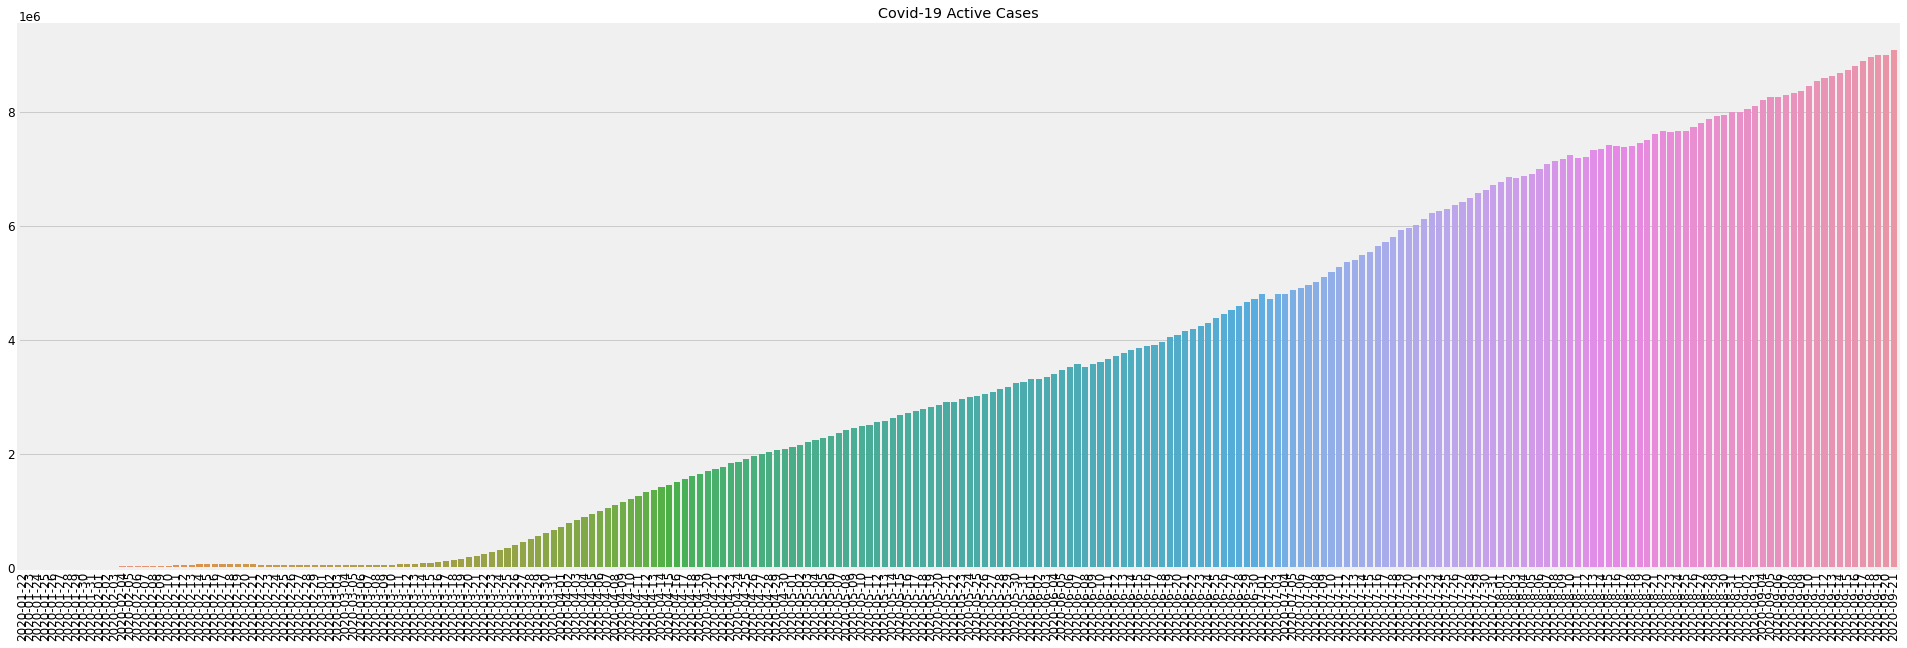

In [42]:
plt.figure(figsize=(30,10))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Covid-19 Active Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

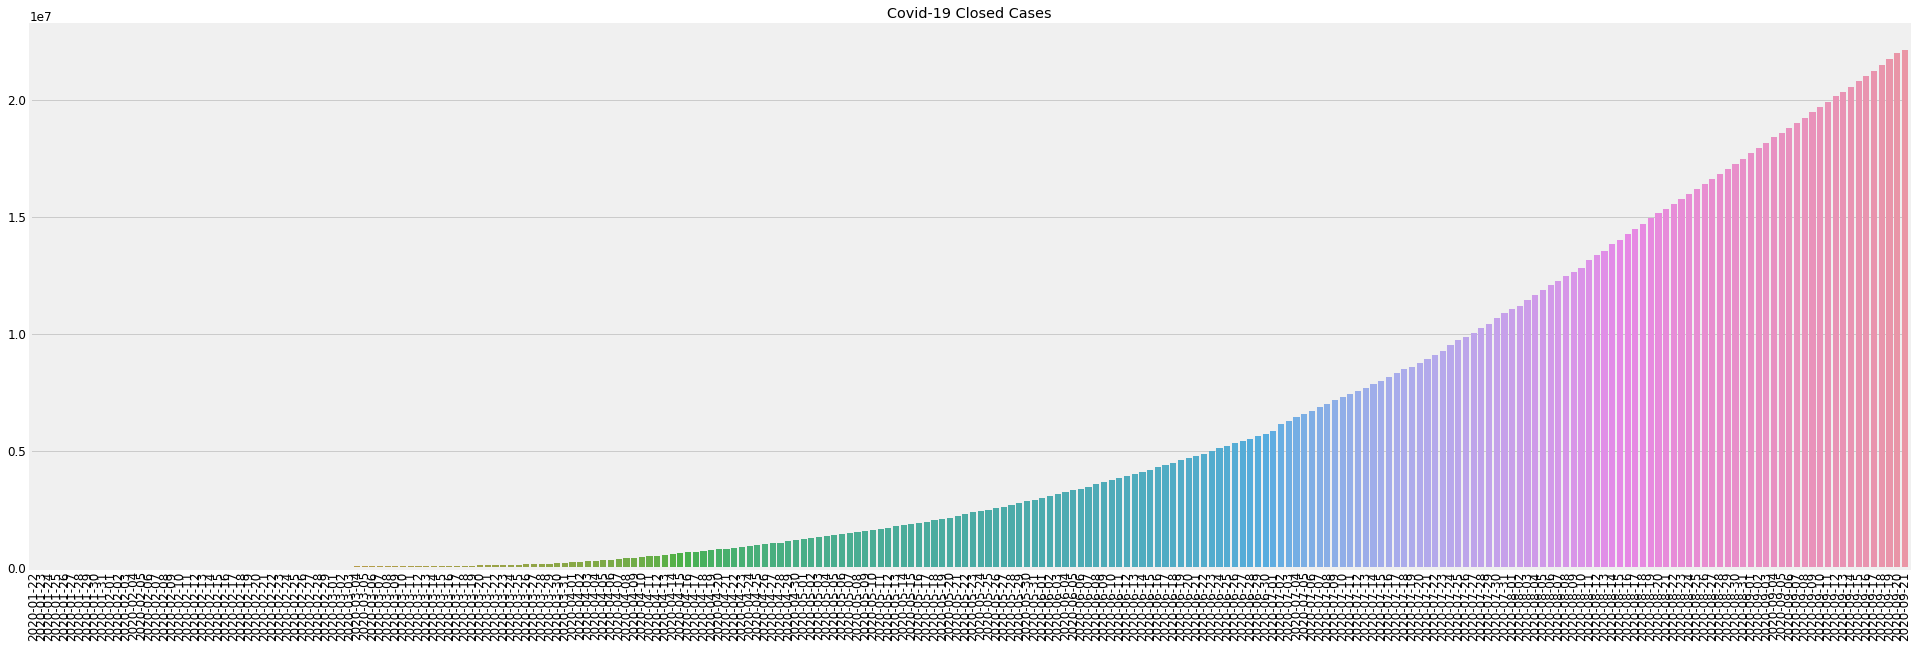

In [43]:
plt.figure(figsize=(30,10))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Covid-19 Closed Cases")
plt.xticks(rotation=90)

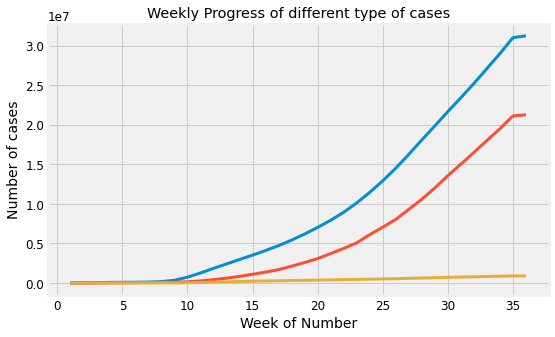

In [44]:
datewise["WeekofYear"]= datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
    
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("Week of Number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different type of cases")
plt.show()

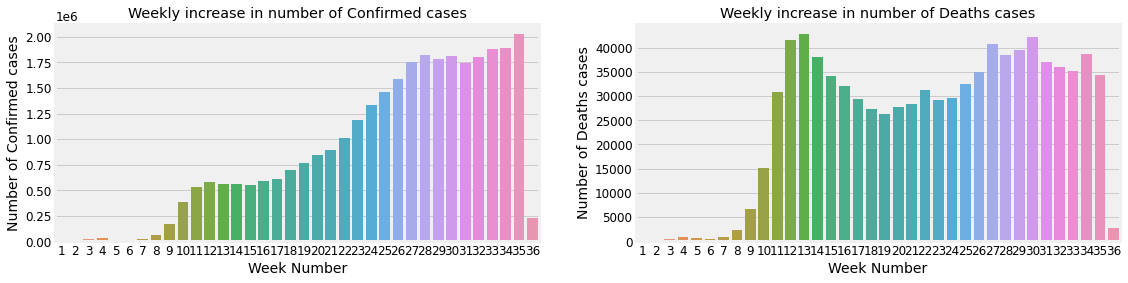

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Deaths cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Deaths cases")
plt.show()

Average increase in number of Confirmed cases everyday: 128051.0
Average increase in number of Recovered cases everyday: 87131.0
Average increase in number of Deaths cases everyday: 3644.0


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699.]), <a list of 9 Text major ticklabel objects>)

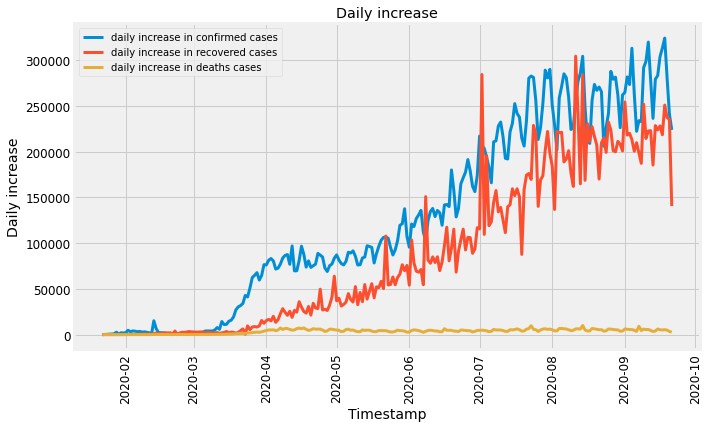

In [46]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(10,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="daily increase in deaths cases",linewidth=3)

plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)

In [47]:
#Country wise analysis
#Calculating Country wise Mortality rate

countrywise=full_grouped[full_grouped["Date"]==full_grouped["Date"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 20 Countries as per number of deaths cases')

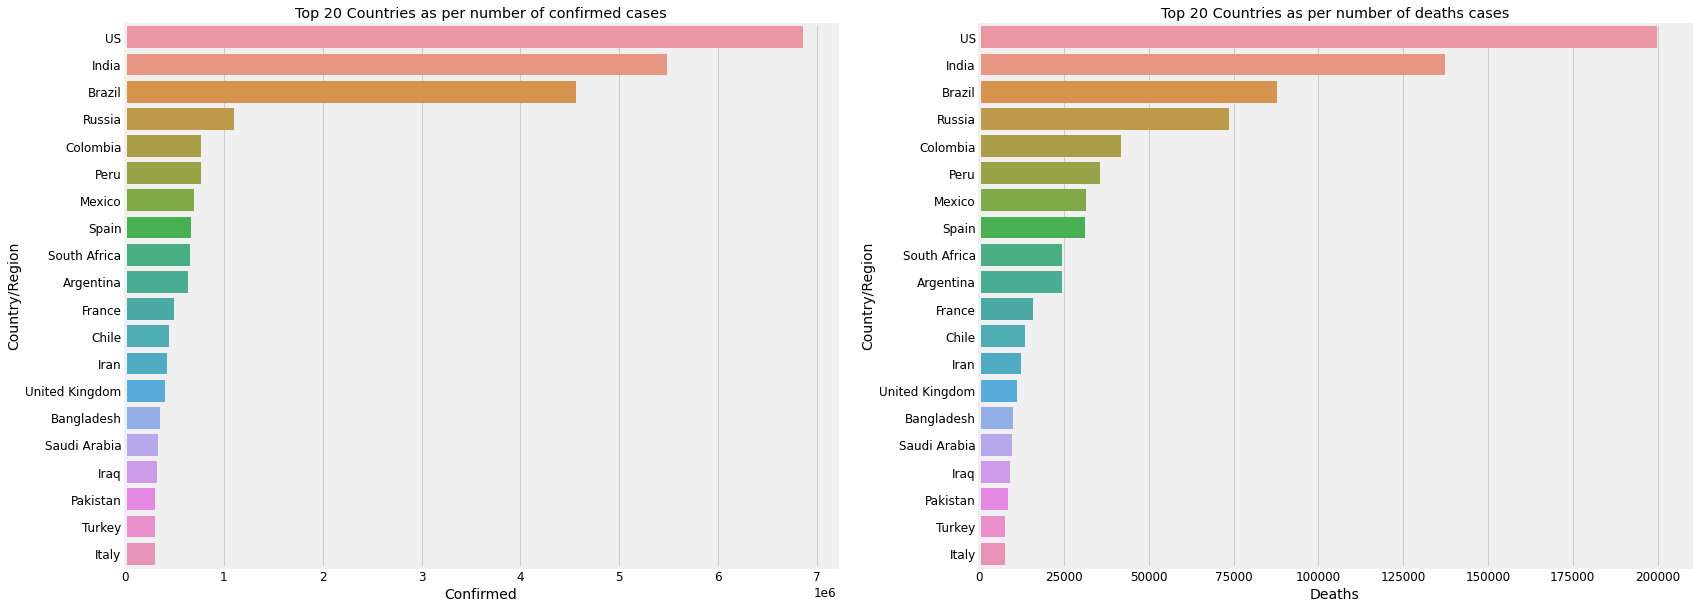

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_20confirm = countrywise.sort_values(["Confirmed"],ascending=False).head(20)
top_20deaths = countrywise.sort_values(["Deaths"],ascending=False).head(20)

sns.barplot(x=top_20confirm["Confirmed"],y=top_20confirm.index,ax=ax1)
ax1.set_title("Top 20 Countries as per number of confirmed cases")
sns.barplot(x=top_20deaths["Deaths"],y=top_20confirm.index,ax=ax2)
ax2.set_title("Top 20 Countries as per number of deaths cases")


In [49]:
#Data Analysis for India

india_data = full_grouped[full_grouped["Country/Region"]=="India"]
datewise_india = india_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("=====================================")
print("Total Active Cases", datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases", datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    5487580.0
Recovered    4396399.0
Deaths         87882.0
Name: 2020-09-21 00:00:00, dtype: float64
Total Active Cases 1003299.0
Total Closed Cases 4484281.0


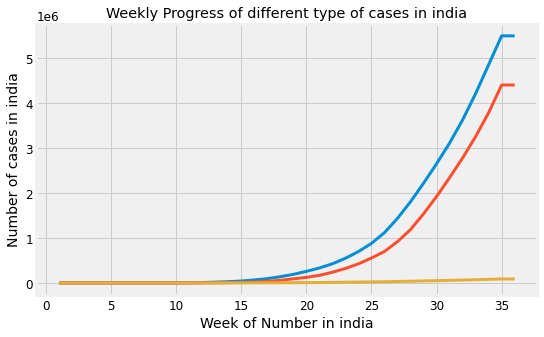

In [50]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_us = []
weekwise_confirmed_us = []
weekwise_recovered_us = []
weekwise_deaths_us = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    weekwise_confirmed_us.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered_us.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths_us.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_us.append(w)
    w=w+1
    
plt.figure(figsize=(8,5))
plt.plot(week_num_us,weekwise_confirmed_us,linewidth=3)
plt.plot(week_num_us,weekwise_recovered_us,linewidth=3)
plt.plot(week_num_us,weekwise_deaths_us,linewidth=3)
plt.xlabel("Week of Number in india")
plt.ylabel("Number of cases in india")
plt.title("Weekly Progress of different type of cases in india")
plt.show()

In [51]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid =  datewise.iloc[:int(datewise.shape[0]*0.95)]
model_scores=[]

In [52]:
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV, train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error
reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
reg.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
prediction_valid_reg = reg.predict(np.array(valid["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid["Days Since"]).reshape(-1,1))

In [54]:
new_date = []
new_predict_lr = []
new_predict_svm = []

for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_predict_lr.append(reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_predict_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
    
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predict = pd.DataFrame(zip(new_date,new_predict_lr,new_predict_svm),columns = ["Dates","LR","SVR"])
model_predict.head(10)

,Dates,LR,SVR
0,2020-09-22,22628709,16409224
1,2020-09-23,22744331,16658208
2,2020-09-24,22859953,16911290
3,2020-09-25,22975576,17168520
4,2020-09-26,23091198,17429950
5,2020-09-27,23206820,17695631
6,2020-09-28,23322442,17965615
7,2020-09-29,23438065,18239953
8,2020-09-30,23553687,18518697
9,2020-10-01,23669309,18801902


#ARIMA

In [55]:
fig = px.bar(df, x='country', y='%Inc Cases', labels={'x':'country'},
             color="%Inc Cases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

In [56]:
fig = px.bar(df, x='country', y='%Inc Deaths', labels={'x':'country'},
             color="%Inc Deaths", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 deaths by country')
fig.show()

In [57]:
predictions_ARIMA_diff=pd.Series(df['Active Cases'],copy=True)
print(predictions_ARIMA_diff.head())

24    67465
18    60339
15    73728
34     9613
39    92928
Name: Active Cases, dtype: int64


In [58]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

24     67465
18    127804
15    201532
34    211145
39    304073
Name: Active Cases, dtype: int64


In [59]:
predictions_ARIMA_log=pd.Series(df['Active Cases'].iloc[0],index=df.index)
Ppredictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

24    67465
18    67465
15    67465
34    67465
39    67465
dtype: int64

In [60]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)

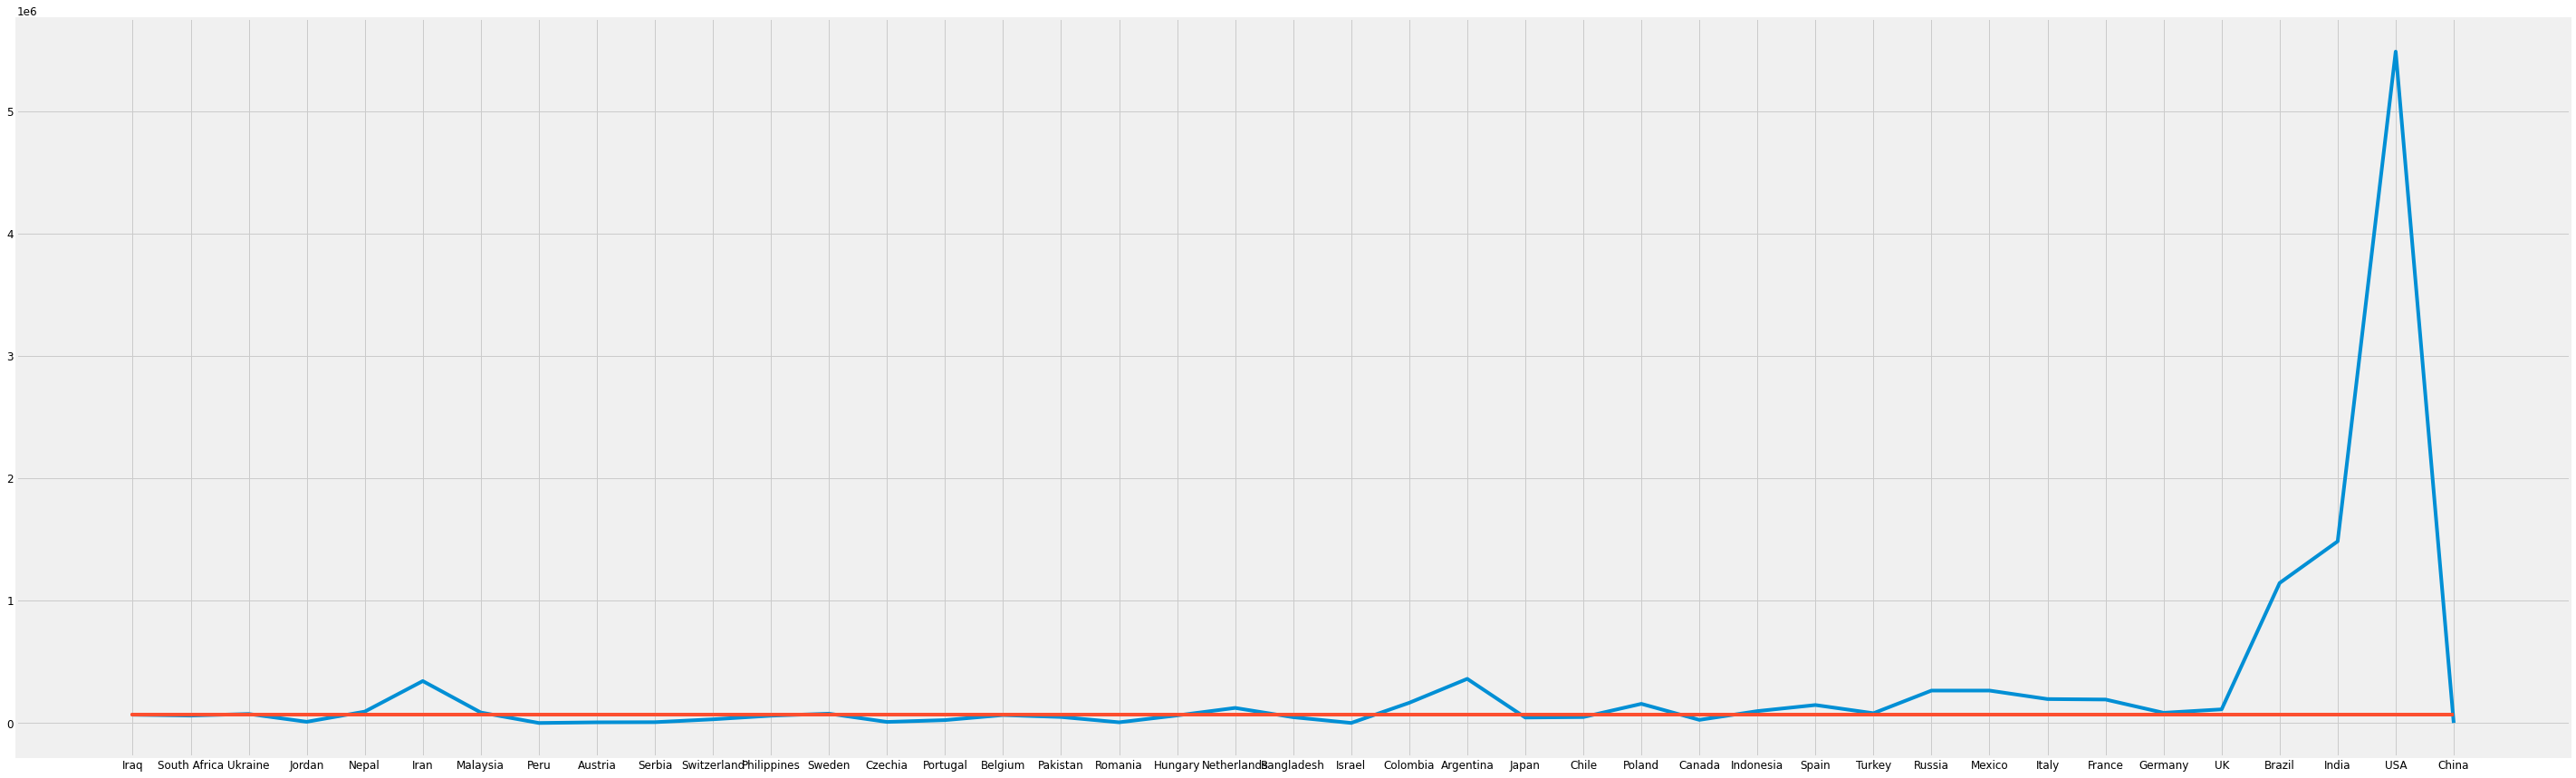

In [61]:
plt.figure(figsize=(45,15))
plt.plot(df['country'],df['Active Cases'])
plt.plot(predictions_ARIMA_log)



In [62]:
from statsmodels.tsa.arima_model import ARMA
from random import random
model=ARMA(df['%Inc Cases'],order=(0,1))
model_fit=model.fit(dis=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [63]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             %Inc Cases   No. Observations:                   41
Model:                     ARMA(0, 1)   Log Likelihood                  -2.426
Method:                       css-mle   S.D. of innovations              0.257
Date:                Sun, 13 Jun 2021   AIC                             10.852
Time:                        19:28:22   BIC                             15.993
Sample:                             0   HQIC                            12.724
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2160      0.043      5.030      0.000       0.132       0.300
ma.L1.%Inc Cases     0.0726      0.144      0.504      0.617      -0.210       0.355
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -13.7690           +0.0000j           13.7690            0.5000
-----------------------------------------------------------------------------
"""

In [64]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [65]:
train.sample(6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
15601,22262,NaN,Tunisia,2020-03-23,89,3
10131,14452,NaN,Kazakhstan,2020-03-13,4,0
18986,27117,Vermont,US,2020-02-07,0,0
14758,21059,NaN,Sri Lanka,2020-03-20,73,0
14914,21305,NaN,Sweden,2020-01-26,0,0
13275,18946,NaN,Philippines,2020-03-07,6,1


In [66]:
test.sample(6)

,ForecastId,Province_State,Country_Region,Date
10441,10442,Kentucky,US,2020-04-23
10824,10825,Montana,US,2020-04-19
10277,10278,Indiana,US,2020-03-19
3797,3798,NaN,Cuba,2020-04-01
535,536,South Australia,Australia,2020-04-07
1322,1323,NaN,Brunei,2020-04-20


In [67]:
df_train = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df_train).head(10)
top10

,ConfirmedCases
Country_Region,
US,188018
Italy,105792
Spain,95923
China,82280
Germany,71808
France,52827
Iran,44605
United Kingdom,25471
Switzerland,16605


In [68]:
fig = px.bar(top10, x=top10.index, y='ConfirmedCases', labels={'x':'Country'},
             color="ConfirmedCases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

In [69]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

In [70]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Italy')
fig.show()

In [71]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()

In [72]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()

In [73]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.tail(5)

,Date,Country_Region,Id,ConfirmedCases,Fatalities
12105,2020-03-31,Uzbekistan,28970,172,2
12106,2020-03-31,Venezuela,29070,135,3
12107,2020-03-31,Vietnam,29170,212,0
12108,2020-03-31,Zambia,29270,35,0
12109,2020-03-31,Zimbabwe,29370,8,1


#Time evaluation

In [74]:
def pltCountry_cases(ConfirmedCases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )

In [75]:
def pltCountry_fatalities(Fatalities,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of fatalities' )

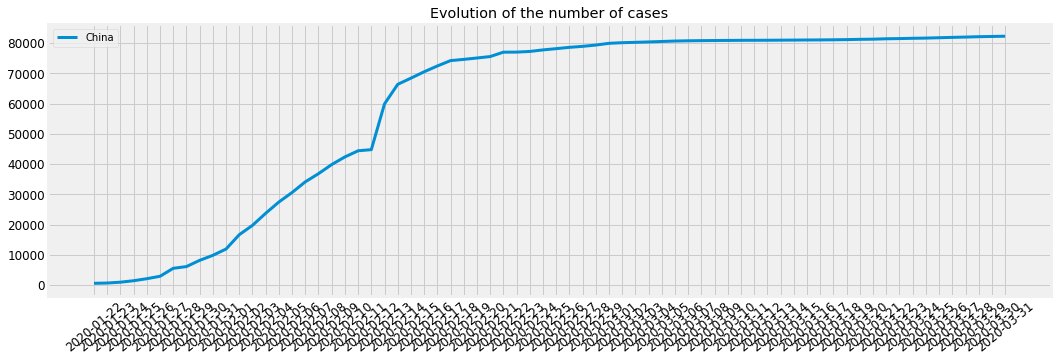

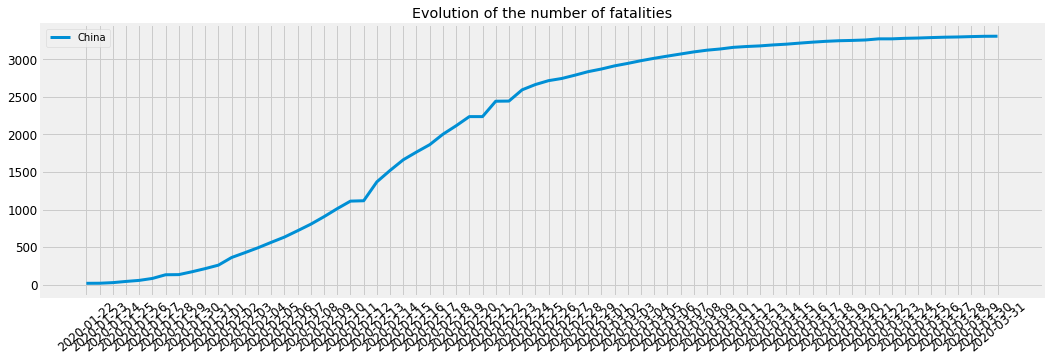

In [76]:
pltCountry_cases('ConfirmedCases','China')
pltCountry_fatalities('Fatalities','China')

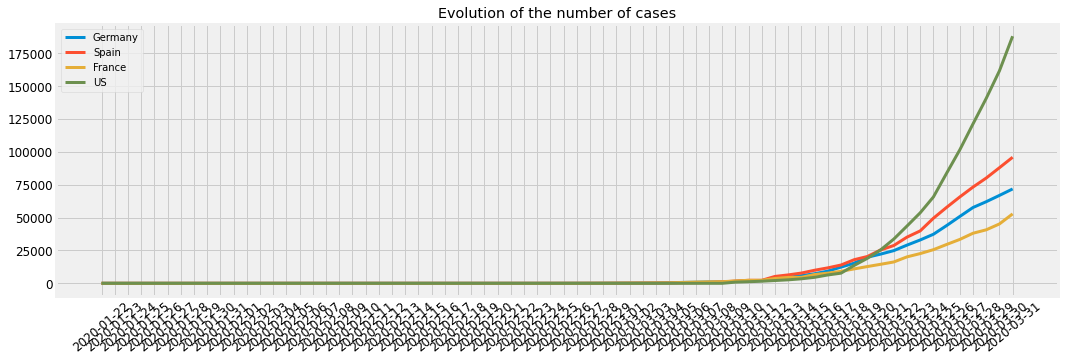

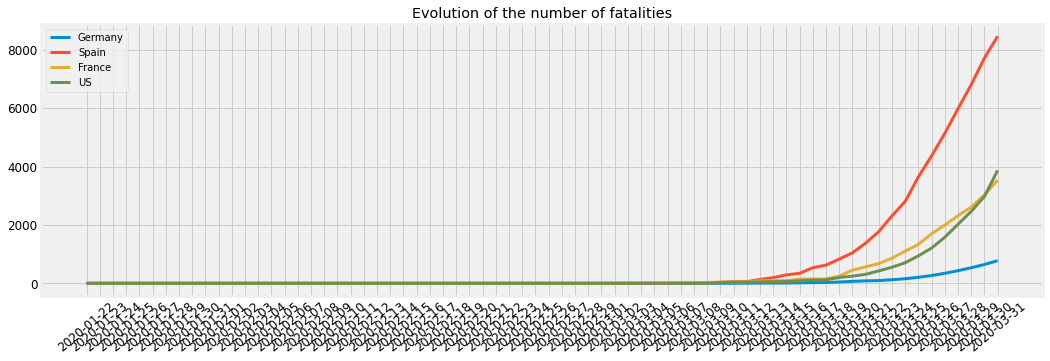

In [77]:
pltCountry_cases('ConfirmedCases', 'Germany','Spain','France','US')
pltCountry_fatalities('Fatilities','Germany','Spain','France','US')

In [78]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [79]:
case='ConfirmedCases'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

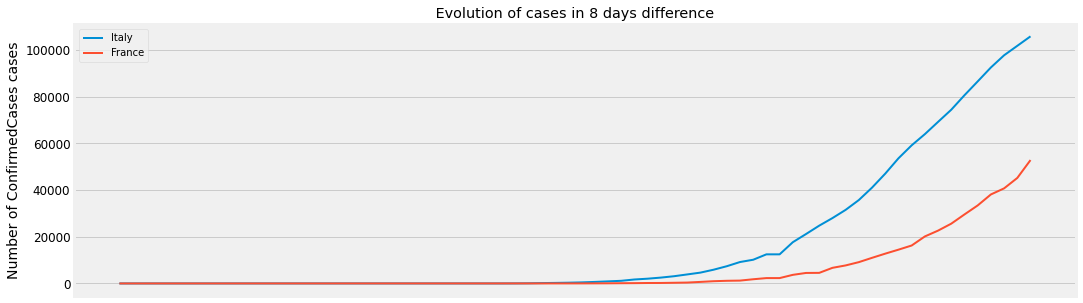

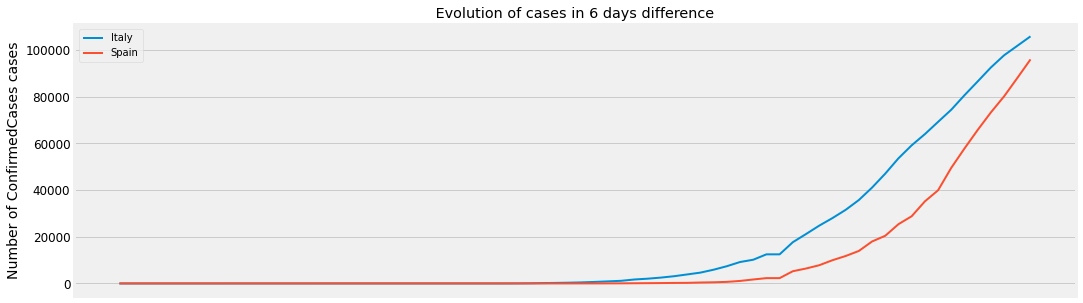

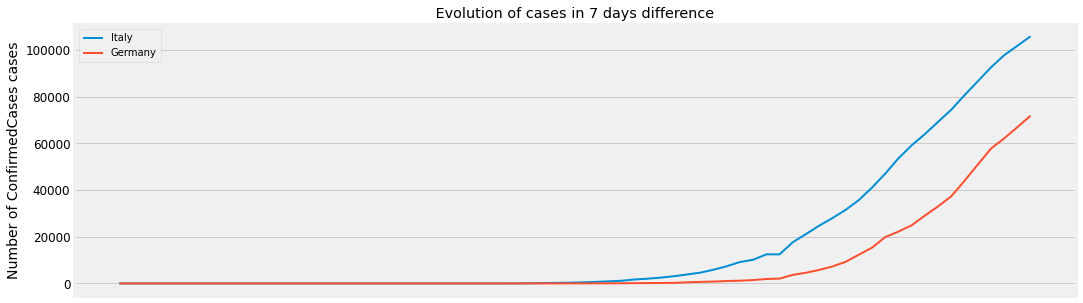

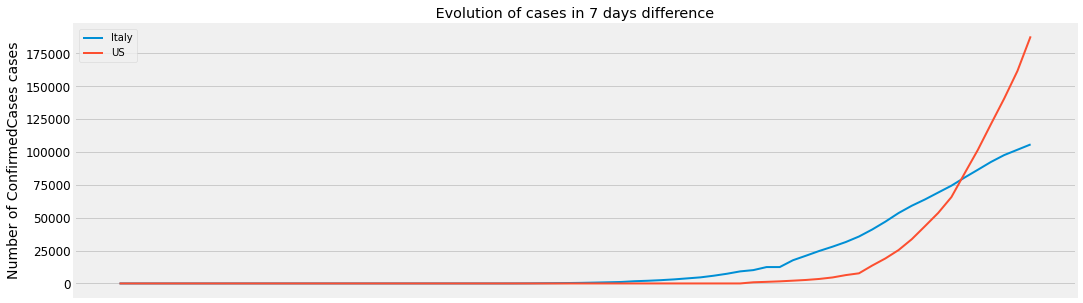

In [80]:
timeCompare(8,'Italy','France')
timeCompare(6,'Italy','Spain')
timeCompare(7,'Italy','Germany')
timeCompare(7,'Italy','US')

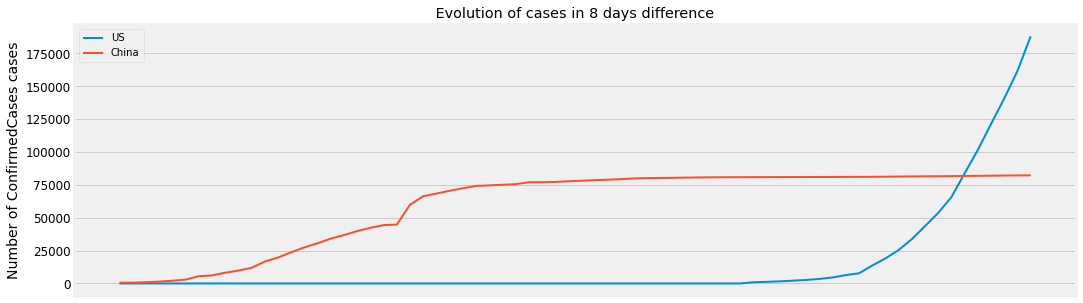

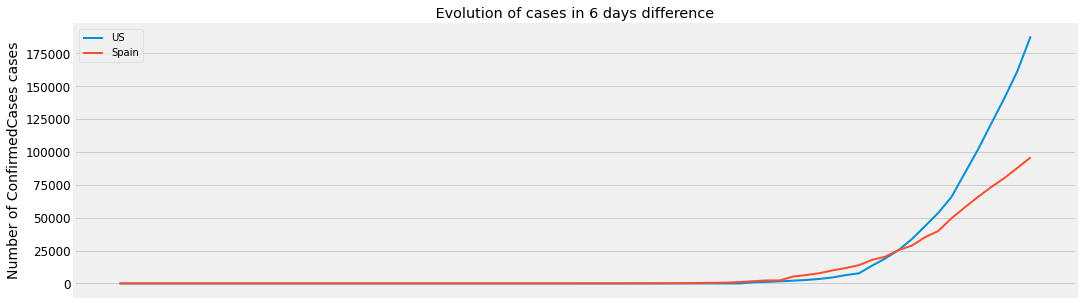

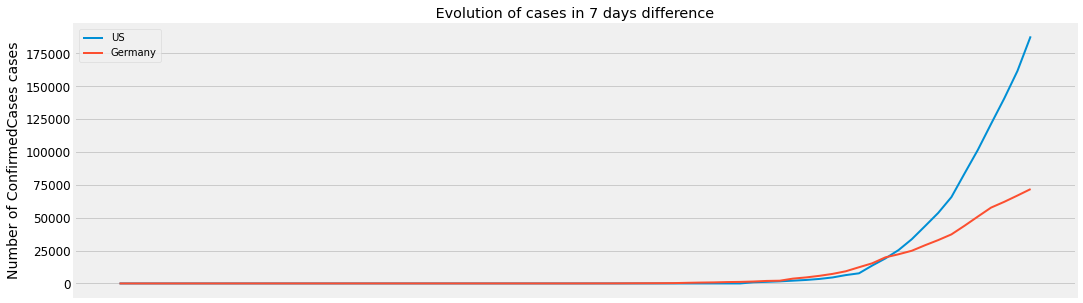

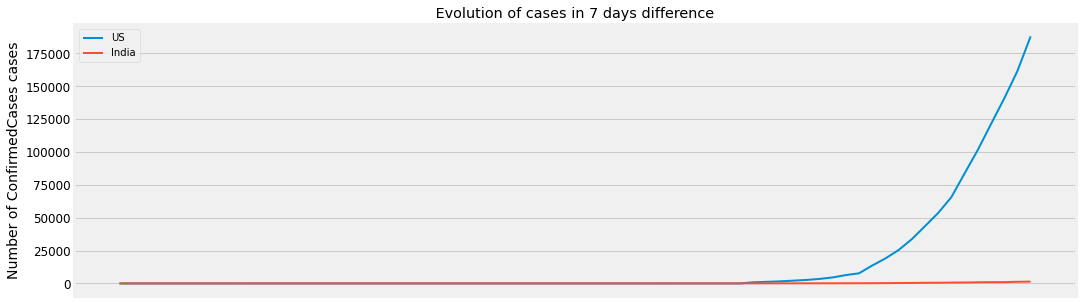

In [81]:
timeCompare(8,'US','China')
timeCompare(6,'US','Spain')
timeCompare(7,'US','Germany')
timeCompare(7,'US','India')

In [82]:
case='Fatalities'
def timeCompare_f(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of Fatalities in %d days difference '%time ,ylabel='Number of %s cases'%case )

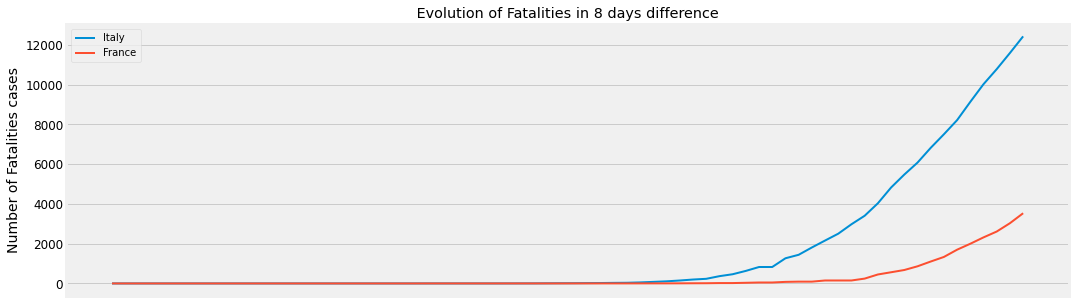

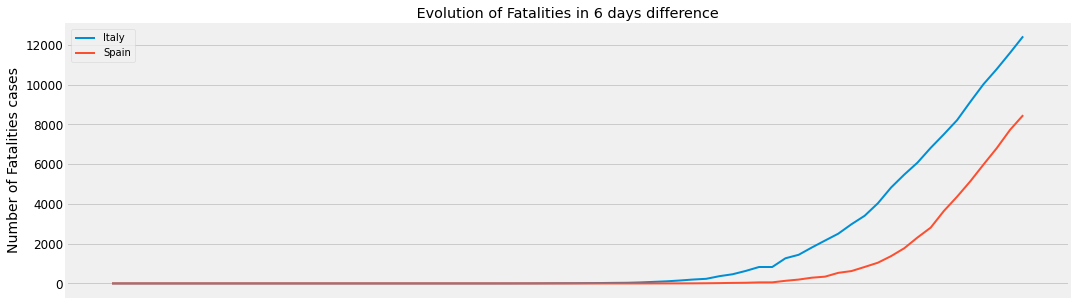

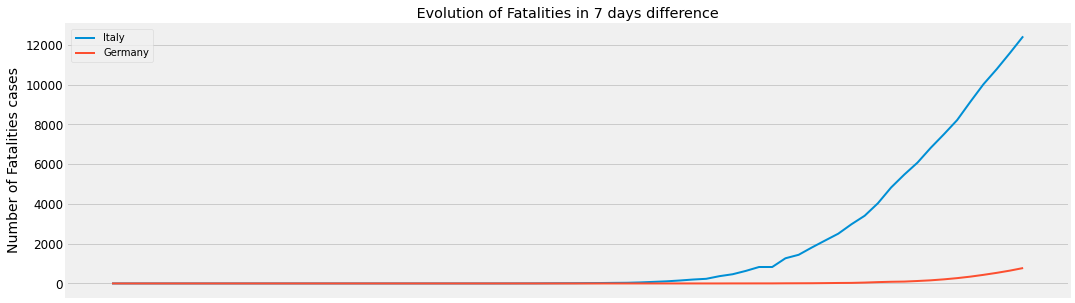

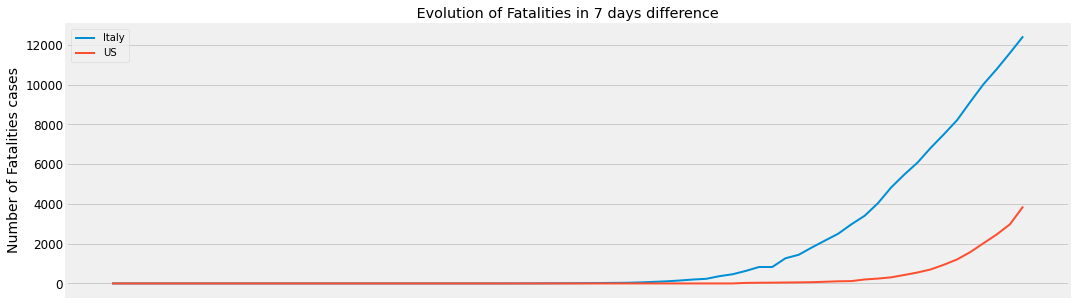

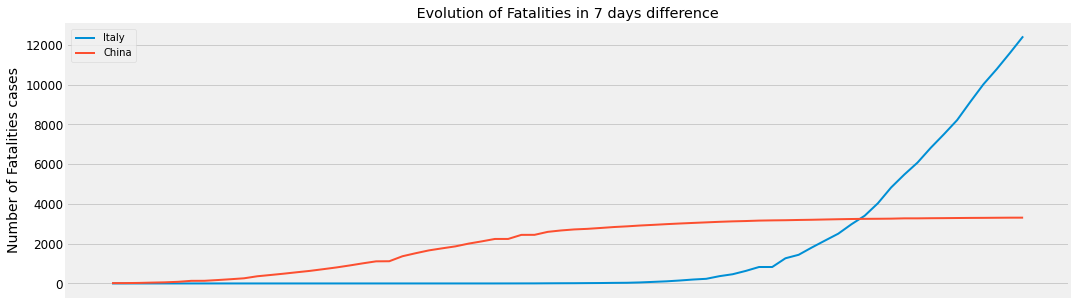

In [83]:
timeCompare_f(8,'Italy','France')
timeCompare_f(6,'Italy','Spain')
timeCompare_f(7,'Italy','Germany')
timeCompare_f(7,'Italy','US')
timeCompare_f(7,'Italy','China')

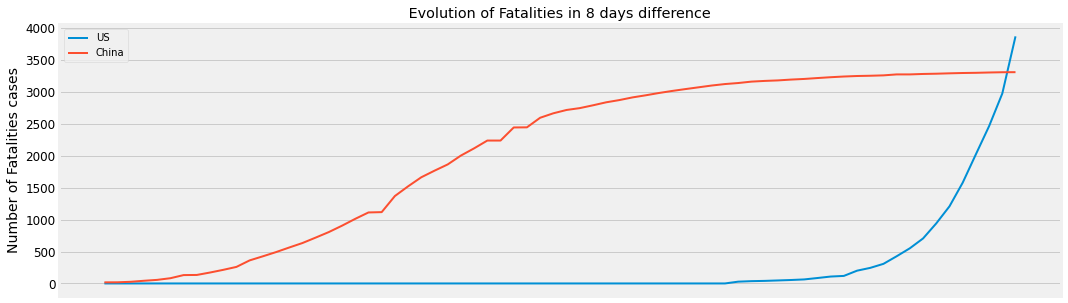

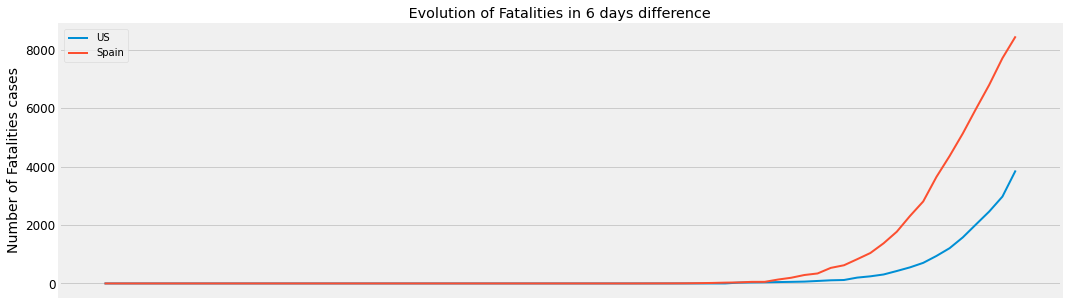

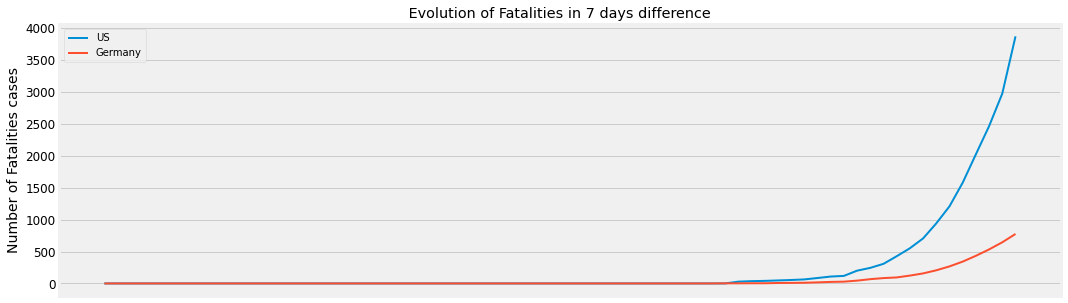

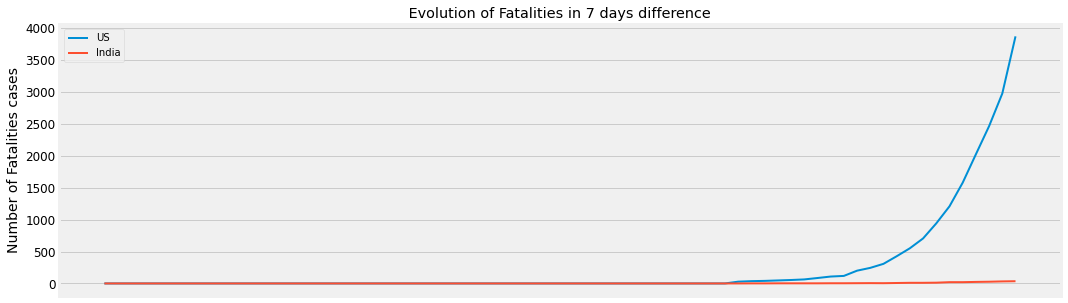

In [84]:
timeCompare_f(8,'US','China')
timeCompare_f(6,'US','Spain')
timeCompare_f(7,'US','Germany')
timeCompare_f(7,'US','India')

#ARIMA

In [85]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

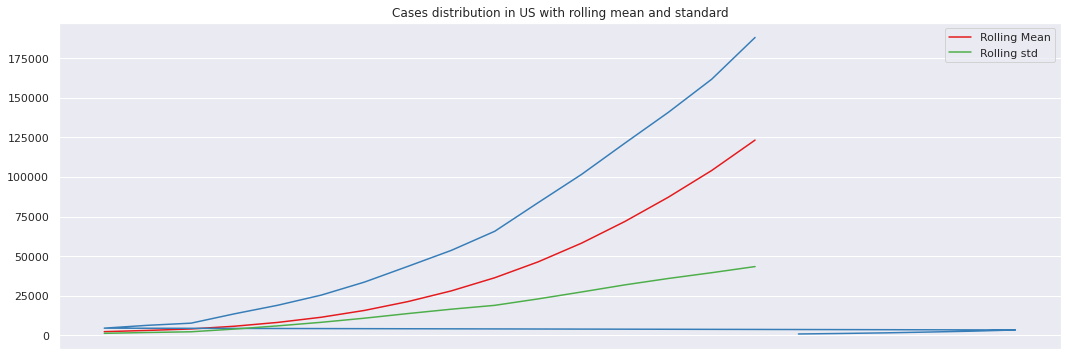

In [86]:
tsC1=roll('US')
rollPlot('US')

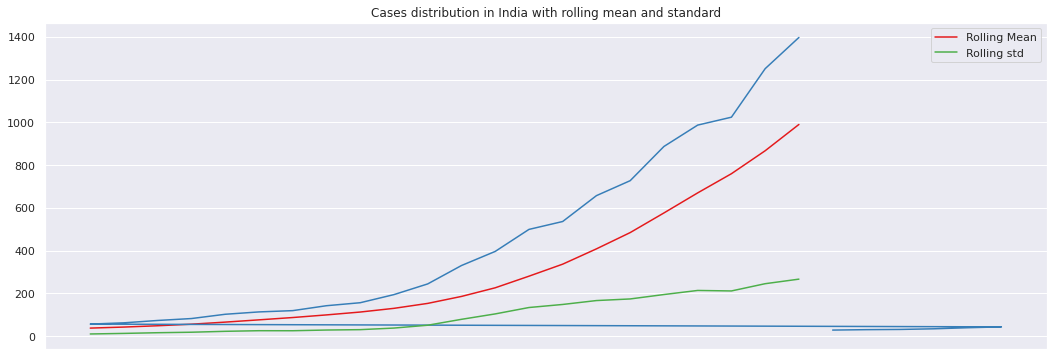

In [87]:
tsC2=roll('India')
rollPlot('India')

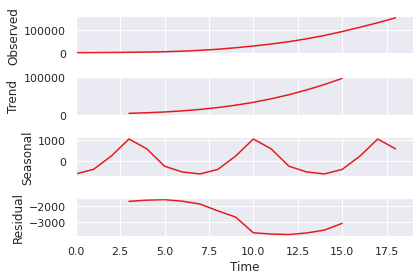

In [88]:
#Decomposing the ts to find its properties
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

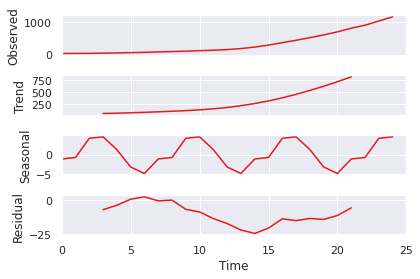

In [89]:
fig=sm.tsa.seasonal_decompose(tsC2.values,freq=7).plot()

In [90]:
#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                -1
p-value                        1
#Lags Used                     7
Number of Observations Used   11
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [91]:
#For US
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                -1
p-value                        1
#Lags Used                     7
Number of Observations Used   11
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [92]:
#For India
tsC=tsC2['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 4
p-value                        1
#Lags Used                     9
Number of Observations Used   15
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


AUTO Correlation

In [93]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")

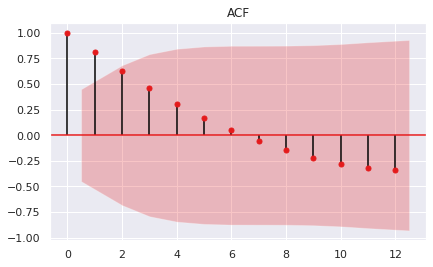

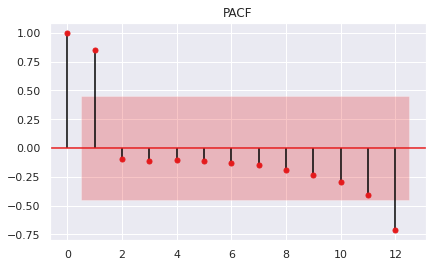

In [94]:
#For US
corr(tsC1)

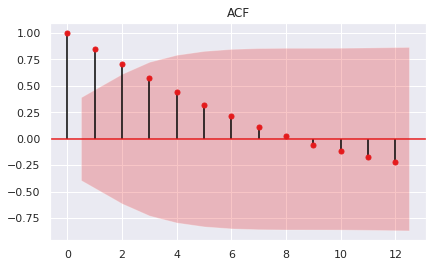

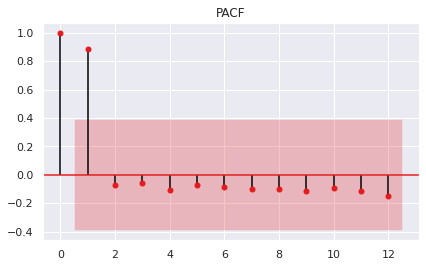

In [95]:
#For India
corr(tsC2)

Model Building

In [96]:
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [97]:
def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [98]:
train_features=pd.DataFrame(create_features(train))
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

In [99]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   19
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -55.663
Method:                       css-mle   S.D. of innovations              4.001
Date:                Sun, 13 Jun 2021   AIC                            119.326
Time:                        19:28:44   BIC                            123.104
Sample:                             2   HQIC                           119.966
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3965      1.997      2.702      0.016       1.483       9.310
ma.L1.D2.y     0.2796      0.161      1.736      0.102      -0.036       0.595
ma.L2.D2.y     1.0000      0.256      3.902      0.0

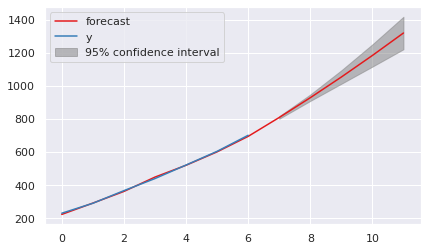

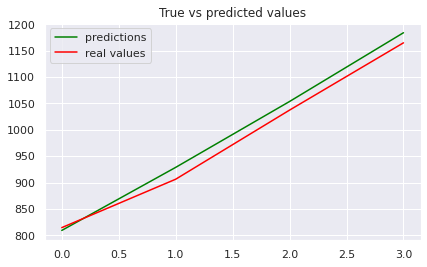

In [100]:
#Mean absolute percentage error
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

The above obtained graphs are Forecasted and predicted cases in coming week

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   19
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -55.663
Method:                       css-mle   S.D. of innovations              4.001
Date:                Sun, 13 Jun 2021   AIC                            119.326
Time:                        19:28:51   BIC                            123.104
Sample:                             2   HQIC                           119.966
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3965      1.997      2.702      0.016       1.483       9.310
ma.L1.D2.y     0.2796      0.161      1.736      0.102      -0.036       0.595
ma.L2.D2.y     1.0000      0.256      3.902      0.0

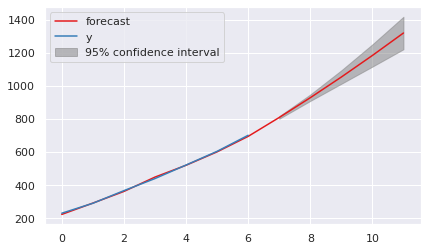

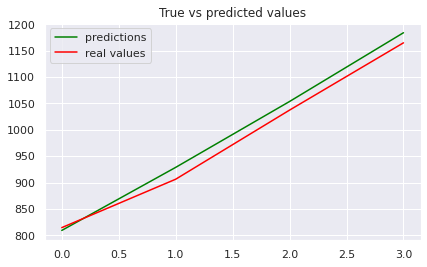

In [101]:
#Mean absolute percentage error
def mape(y2, y_pred): 
    y2, y_pred = np.array(y2), np.array(y_pred)
    return np.mean(np.abs((y2 - y_pred) / y2)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

The above are the forecated and predicted fatalities in coming weeks

#PROPHET

In [102]:
traindf = pd.read_csv('/content/vaccinations_us.csv')
traindf.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,United States,2020-12-20,Pfizer/BioNTech,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,556208,556208,nan
1,United States,2020-12-21,Pfizer/BioNTech,https://covid.cdc.gov/covid-data-tracker/#vacc...,614117,614117,nan
2,United States,2020-12-23,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1008025,1008025,nan
3,United States,2020-12-26,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1944585,1944585,nan
4,United States,2020-12-28,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2127143,2127143,nan


In [103]:
_train = traindf.groupby(['date'])['people_vaccinated'].sum()
top10 = pd.DataFrame(_train).head(10)
top10

,people_vaccinated
date,
2020-12-20,556208
2020-12-21,614117
2020-12-23,1008025
2020-12-26,1944585
2020-12-28,2127143
2020-12-30,2794588
2021-01-02,4225756
2021-01-04,4563260
2021-01-05,4836469


In [104]:
train_prophet=pd.DataFrame()
train_prophet['ds']=_train.index
train_prophet['y']=_train.values

In [105]:
train_prophet.head()

,ds,y
0,2020-12-20,556208
1,2020-12-21,614117
2,2020-12-23,1008025
3,2020-12-26,1944585
4,2020-12-28,2127143


In [106]:
from fbprophet import Prophet
model=Prophet(yearly_seasonality=True,seasonality_mode='multiplicative')
model.fit(train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [107]:
future=model.make_future_dataframe(periods=36,freq='MS')
future.tail()

,ds
175,2024-01-01
176,2024-02-01
177,2024-03-01
178,2024-04-01
179,2024-05-01


In [108]:
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,2024-01-01,297385950,296215221,298612269
176,2024-02-01,657446170,655930201,659162864
177,2024-03-01,825850035,823931086,827882369
178,2024-04-01,1169211255,1166723980,1171697765
179,2024-05-01,1341172570,1338443259,1344155191


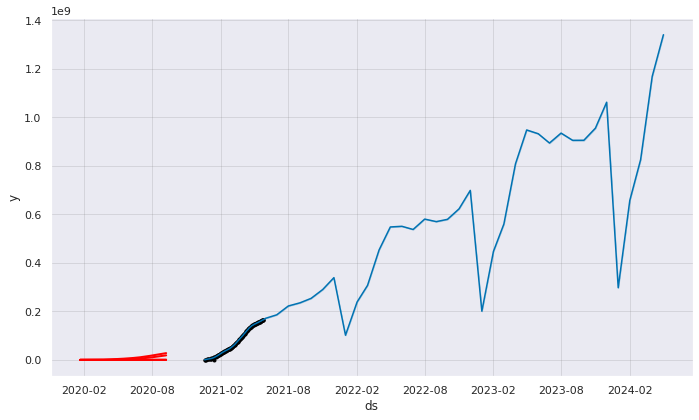

In [109]:
fig=model.plot(forecast)
plt.plot(valid,label='Vaccinated',color='red',linewidth=2)
plt.show()

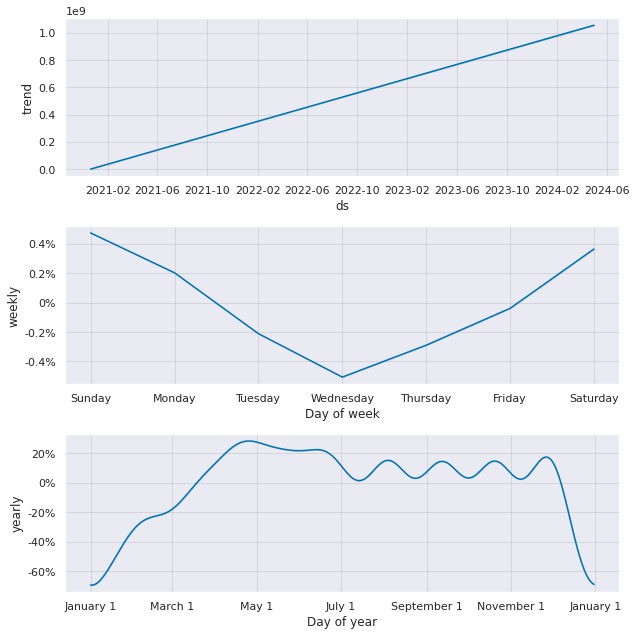

In [110]:
model.plot_components(forecast);

above the people to be vaccinated is forecasted using fbprophet